## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej (y) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

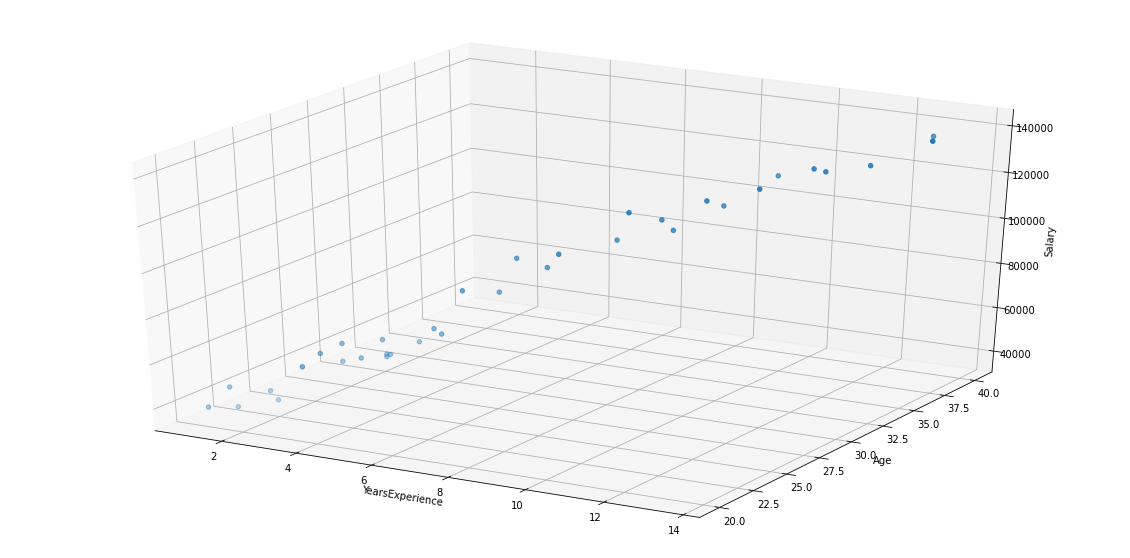

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

df = pd.read_csv('datasets/Salary.csv', sep=',')
x1 = df['YearsExperience'].to_numpy()
x2 = df['Age'].to_numpy()
y = df['Salary'].to_numpy()

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection = "3d")
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
    
ax.scatter3D(x1, x2, y);
plt.show()

In [2]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode()

data = go.Scatter3d(x = x1, y =x2, z = y)

layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})

plot_figure = go.Figure(data = [data], layout = layout)
plotly.offline.iplot(plot_figure)

ModuleNotFoundError: No module named 'plotly'

## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

In [3]:
import random

'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
def learn_and_fit(X, y):
    b0 = []
    betas = []
    error = []

    beta_0 = random.uniform(0, 1)
    beta_1 = random.uniform(0, 1)
    beta_2 = random.uniform(0, 1)
    alpha = 0.00001
    
    epochs = 200
    
    for epoch in range(epochs):
        y_pred = []  # prediction
        ssr = 0  # error
        ssr_beta_0 = 0  # derivative
        ssr_beta_1 = 0  
        ssr_beta_2 = 0 
        
        for i in range(len(X)):
            prediction = beta_0 + (beta_1 * X[i][0]) + (beta_2 * X[i][1]) 
            y_pred.append(prediction)
            ssr += ((prediction - y[i][0]) ** 2) 
            
            ssr_beta_0 += (y_pred[i] - y[i][0]) 
            ssr_beta_1 += ((y_pred[i] - y[i][0]) * X[i][0])
            ssr_beta_2 += ((y_pred[i] - y[i][0]) * X[i][1])

        ssr_beta_0 /= len(X)
        ssr_beta_1 /= len(X)
        ssr_beta_2 /= len(X)
        ssr /= (2 * len(X))
        
        beta_0 -= alpha * ssr_beta_0
        beta_1 -= alpha * ssr_beta_1
        beta_2 -= alpha * ssr_beta_2
        
        if(len(error) > 0 ):
            if(ssr >= error[-1]):
                break
                
        b0.append(beta_0)
        betas.append([beta_1, beta_2])
        error.append(ssr)
    
    return b0, betas, error

In [4]:
X = df[['YearsExperience', 'Age']].values.reshape(df['YearsExperience'].shape[0], 2)
y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

b0, betas, error = learn_and_fit(X, y)

### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Pokaż w formie animacji, jak zmieniała się regresja w kolejnych epokach.

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection = "3d")

ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')

y_pred = [b0[i] + (betas[i][0] * x1[i]) + (betas[i][1] * x2[i]) for i in range(len(x1))]

ax.scatter3D(x1, x2, y);
ax.plot3D(x1, x2, y_pred, 'red')

plt.show()

In [ ]:
import numpy as np
import matplotlib
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML

matplotlib.rcParams['animation.embed_limit'] = 2 ** 128

def update_lines(i):
    line.set_xdata(x1)
    line.set_ydata(x2)
    line.set_3d_properties(b0[i] + (betas[i][0] * x1) + (betas[i][1] * x2))

fig = plt.figure(figsize=(20, 10))
ax = p3.Axes3D(fig)

ax.set_xlabel('YearsExperience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')

ax.scatter3D(x1, x2, y);

line, = ax.plot(x1, x2, b0[0] + (betas[0][0] * x1) + (betas[0][1] * x2), color = 'red')

ani = animation.FuncAnimation(fig, update_lines, len(b0), interval=50, blit=False)

HTML(ani.to_jshtml())

### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

##### Wczytanie zestawu danych multi_variable_regression.csv

In [ ]:
df = pd.read_csv('datasets/multi_variable_regression.csv', sep=',')

X = df[['x1','x2','x3','x4','x5','x6']]
y = df['y'].values

df

##### Funkcje pomocnicze

- `calculate_prediction` - obliczenie wartości funkcji regresji dla pojedynczej obserwacji 
- `get_predictions` - obliczenie wartości funkcji regresji dla wszystkich obserwacji w zbiorze danych
- `calculate_ssr` - obliczenie wartości błędu regresji
- `calculate_derivatives` - obliczenie pochodnych cząstkowych względem współczynników regresji
- `update_betas` - aktualizacja współczynników regresji (wag)

In [ ]:
def calculate_prediction(X, row, betas):
    prediction = betas[0]
    for col in range(1, len(betas)):
        prediction += betas[col] * X.iloc[row][col - 1]
    return prediction


def get_predictions(X, betas):
    return [calculate_prediction(X, row, betas) for row in range(len(X))]


def calculate_ssr(y, y_pred):
    ssr = 0
    for row in range(len(y)):
        ssr += ((y_pred[row] - y[row]) ** 2)
    ssr /= (2 * len(y))
    return ssr


def calculate_derivatives(X, y, y_pred):
    der = [0 for i in range(X.shape[1] + 1)]  
    
    for col in range(len(der)):
        for row in range(len(X)):
            if(col == 0):
                der[col] += (y_pred[row] - y[row])
            else:
                der[col] += (y_pred[row] - y[row]) * X.iloc[row][col - 1]       
        der[col] /= len(X)

    return der


def update_betas(betas, alpha, ssr, der):
    for col in range(len(der)):
        betas[col] -= (alpha * der[col])
        
    return betas

##### Implementacja funkcji learn_and_fit_multi(X, y)

In [ ]:
def learn_and_fit_multi(X, y):
    b0 = []
    betas = []
    error = []

    betas_tmp = [random.uniform(0, 1) for i in range(X.shape[1] + 1)]
    
    alpha = 0.00001
    epochs = 1000
    
    for epoch in range(epochs):
        y_pred = get_predictions(X, betas_tmp)
        ssr = calculate_ssr(y, y_pred)
        der = calculate_derivatives(X, y, y_pred)
        betas_tmp = update_betas(betas_tmp, alpha, ssr, der)
        
        b0.append(betas_tmp[0])
        betas.append(betas_tmp[1:])
        error.append(ssr)
    
    return b0, betas, error

In [ ]:
b0, betas, error = learn_and_fit_multi(X, y)

### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

In [ ]:
def plot_error(error):
    fig = plt.figure(figsize=(10, 5))

    plt.xlabel('epoch')
    plt.ylabel('SSR')

    plt.plot([i for i in range(len(error))], error, 'r-') 
    plt.show()

In [ ]:
plot_error(error)

Powyższy wykres zależności błędu względem kolejnych epok wskazuje na poprawne działanie algorytmu - błąd maleje. Co więcej warto zauważyć, że minimalizacja błędu zachodzi liniowo i progresywnie jakość rozwiązania jest podnoszona.

##### Sprawdzenie funkcji learn_and_fit_multi(X, y) na zestawie danych Salary

In [ ]:
df = pd.read_csv('datasets/Salary.csv', sep=',')

X = df[['YearsExperience', 'Age']]
y = df['Salary'].values

b0, betas, error = learn_and_fit_multi(X, y)

In [ ]:
plot_error(error)